# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) #qué logro con esta línea?
path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)
# por qué no hacer directo df = pd.read_csv('datos_properati_limpios_model.csv')?

In [2]:
import numpy as np

In [3]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [4]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [5]:
# En esta celda cargá el regresor y realizá el entrenamiento

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [6]:
# Acá realizá la predicción

y_pred = dtr.predict(X_test)
y_pred

array([140000.  , 140000.  , 130000.  , ...,  85000.  ,  97269.87,
       160000.  ])

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [7]:
# En esta celda calculá el rmse

from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(y_test, y_pred)

np.sqrt(tree_mse)

26146.69479432012

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [8]:
rmses_train = [] 
rmses_test = []

for i in np.arange(1,60,5):
    
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    y_pred_train = dtr.predict(X_train)
    y_pred_test = dtr.predict(X_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

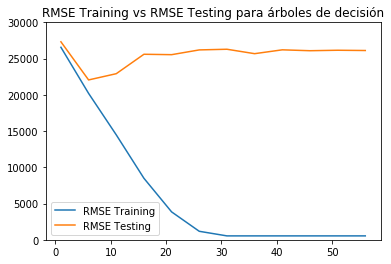

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,60, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,60, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [10]:
y_train.head()

5016    99000.000
950    115000.000
6298    86500.000
3648   130000.000
4632   130000.000
Name: price_aprox_usd, dtype: float64

In [11]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn_model = knn.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

23284.185656569083

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [12]:
# Calculá los cambio en el rmse en esta celda

rmses_train = [] 
rmses_test = []

for i in np.arange(1,40,1):
    
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_train = knn_model.predict(X_train)
    y_pred_test = knn_model.predict(X_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

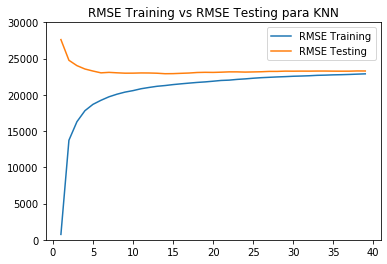

In [13]:
plt.plot(range(1,40, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,40, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [14]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [16]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
cross_val_score(regressor, X, y, cv=10)



array([0.42313093, 0.45500629, 0.45200023, 0.50950071, 0.46917169,
       0.5355416 , 0.47845439, 0.39833722, 0.45439654, 0.41221927])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [17]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [18]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [19]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,170000.000,156227.327,13772.673
1,139000.000,143558.528,4558.528
2,147000.000,143558.528,3441.472
3,105000.000,107179.655,2179.655
4,165000.000,120345.049,44654.951
5,150000.000,143558.528,6441.472
6,132000.000,156227.327,24227.327
7,115000.000,156227.327,41227.327
8,128000.000,127284.762,715.238
9,169000.000,143558.528,25441.472
